Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\layers\se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\backbones\csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


09/18 17:07:14 - mmengine - INFO - the output image has been saved at ./Results\humanadnanimal.jpg
Image name: humanadnanimal.jpg
Number of humans on the image:1
Number of humans detected:1
Detection time:2.6999623514711857e-06 seconds
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\layers\se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\backbones\csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


09/18 17:07:18 - mmengine - INFO - the output image has been saved at ./Results\group.jpg
Image name: group.jpg
Number of humans on the image:22
Number of humans detected:21
Detection time:2.3999600671231747e-06 seconds
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\layers\se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\backbones\csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


09/18 17:07:21 - mmengine - INFO - the output image has been saved at ./Results\one.jpg
Image name: one.jpg
Number of humans on the image:1
Number of humans detected:1
Detection time:2.7999631129205227e-06 seconds
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\layers\se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\backbones\csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


09/18 17:07:24 - mmengine - INFO - the output image has been saved at ./Results\manwithoutlimbs.jpg
Image name: manwithoutlimbs.jpg
Number of humans on the image:1
Number of humans detected:1
Detection time:2.500019036233425e-06 seconds
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\layers\se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\backbones\csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


09/18 17:07:28 - mmengine - INFO - the output image has been saved at ./Results\group2.jpg
Image name: group2.jpg
Number of humans on the image:8
Number of humans detected:5
Detection time:2.600019797682762e-06 seconds
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmdet_m_8xb32-100e_coco-obj365-person-235e8209.pth


c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\layers\se_layer.py:158: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):
c:\Users\pawel\miniconda3\envs\openmmlab\lib\site-packages\mmdet\models\backbones\csp_darknet.py:118: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


09/18 17:07:31 - mmengine - INFO - the output image has been saved at ./Results\animallikehuman.jpg
Image name: animallikehuman.jpg
Number of humans on the image:0
Number of humans detected:1
Detection time:2.8999638743698597e-06 seconds


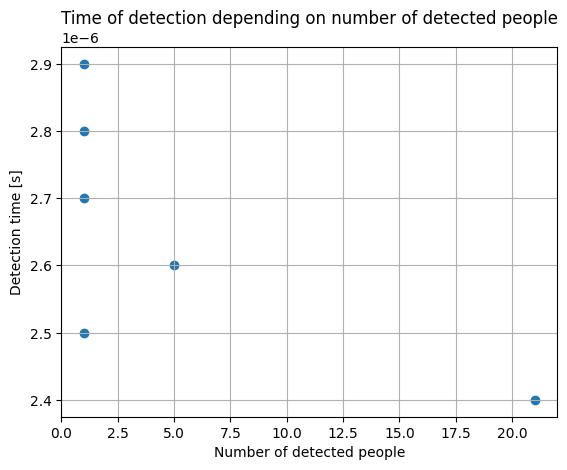

In [12]:
import time
import mmpose
from mmpose.apis import MMPoseInferencer
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt

time_res = []


  # replace this with your own image path
def test_mmposeinter_human(img_path,num_of_h):
# instantiate the inferencer using the model alias
    inferencer = MMPoseInferencer('human')

# The MMPoseInferencer API employs a lazy inference approach,
# creating a prediction generator when given input
    start = time.perf_counter()
    result_generator = inferencer(img_path, show=True, vis_out_dir='./Results')
    stop = time.perf_counter()
    result = next(result_generator)
    print(f"Image name: {Path(img_path).name}")
    print(f"Number of humans on the image:{num_of_h}")
    print(f"Number of humans detected:{len(result['predictions'][0])}")
    print(f"Detection time:{stop-start} seconds")
    nb = len(result['predictions'][0])
    return stop-start, nb
    
nb_h_l = []

img_path = './InputsJPGs/humanadnanimal.jpg' 
t, nb_det = test_mmposeinter_human(img_path,1)
time_res.append(t)
nb_h_l.append(nb_det)

img_path = './InputsJPGs/group.jpg' 
t, nb_det = test_mmposeinter_human(img_path,22)
time_res.append(t)
nb_h_l.append(nb_det)

img_path = './InputsJPGs/one.jpg' 
t, nb_det = test_mmposeinter_human(img_path,1)
time_res.append(t)
nb_h_l.append(nb_det)

img_path = './InputsJPGs/manwithoutlimbs.jpg' 
t, nb_det = test_mmposeinter_human(img_path,1)
time_res.append(t)
nb_h_l.append(nb_det)

img_path = './InputsJPGs/group2.jpg' 
t, nb_det = test_mmposeinter_human(img_path,8)
time_res.append(t)
nb_h_l.append(nb_det)

img_path = './InputsJPGs/animallikehuman.jpg'
t, nb_det = test_mmposeinter_human(img_path,0)
time_res.append(t)
nb_h_l.append(nb_det)



plt.scatter(nb_h_l,time_res)
plt.grid()
plt.title("Time of detection depending on number of detected people")
plt.xlabel('Number of detected people')
plt.ylabel('Detection time [s]')
plt.show()
